##**Training and Testing Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("car.txt", delimiter = "\t")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


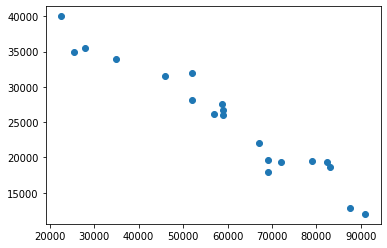

In [ ]:
plt.scatter(df['Mileage'],df['Sell Price($)'])


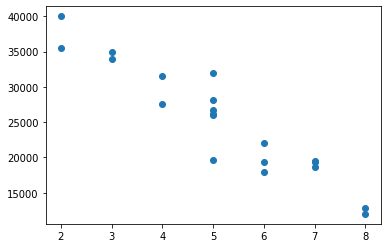

In [ ]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

Using linear regression model makes sense as we can clearly see a linear relationship between dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets

**Training**: We will train our model on this dataset

**Testing**: We will use this subset to make actual predictions using trained model

The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model.

In [ ]:
X = df[['Mileage','Age(yrs)']]

In [ ]:
y = df['Sell Price($)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [ ]:
X_train

,Mileage,Age(yrs)
9,67000,6
12,59000,5
10,83000,7
1,35000,3
7,72000,6
18,87600,8
5,59000,5
19,52000,5
15,25400,3
0,69000,6


In [ ]:
X_test

,Mileage,Age(yrs)
2,57000,5
3,22500,2
17,69000,5
6,52000,5
11,79000,7
16,28000,2


In [ ]:
y_train

9     22000
12    26000
10    18700
1     34000
7     19300
18    12800
5     26750
19    28200
15    35000
0     18000
8     12000
4     31500
13    27500
14    19400
Name: Sell Price($), dtype: int64

In [ ]:
y_test


2     26100
3     40000
17    19700
6     32000
11    19500
16    35500
Name: Sell Price($), dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,Mileage,Age(yrs)
2,57000,5
3,22500,2
17,69000,5
6,52000,5
11,79000,7
16,28000,2


In [ ]:
clf.predict(X_test)

array([25903.20212295, 38840.09080753, 24104.22463297, 26652.77607711,
       17428.5244574 , 38015.55945796])

In [ ]:
y_test

2     26100
3     40000
17    19700
6     32000
11    19500
16    35500
Name: Sell Price($), dtype: int64

In [ ]:
#check the accuracy of the model 
clf.score(X_test, y_test)

0.8320271941187345

#**2- Classification**

Popular Classification Algorithms:
* Logistic Regression((Binary Classification))
* Decision Tree
* Support Vector Machines(SVM)

##**2.1- Logistic Regression**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv("insurance.txt", delimiter = "\t")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


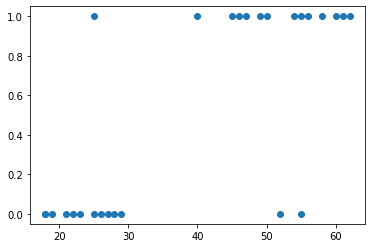

In [ ]:
plt.scatter(df.age,df.bought_insurance)

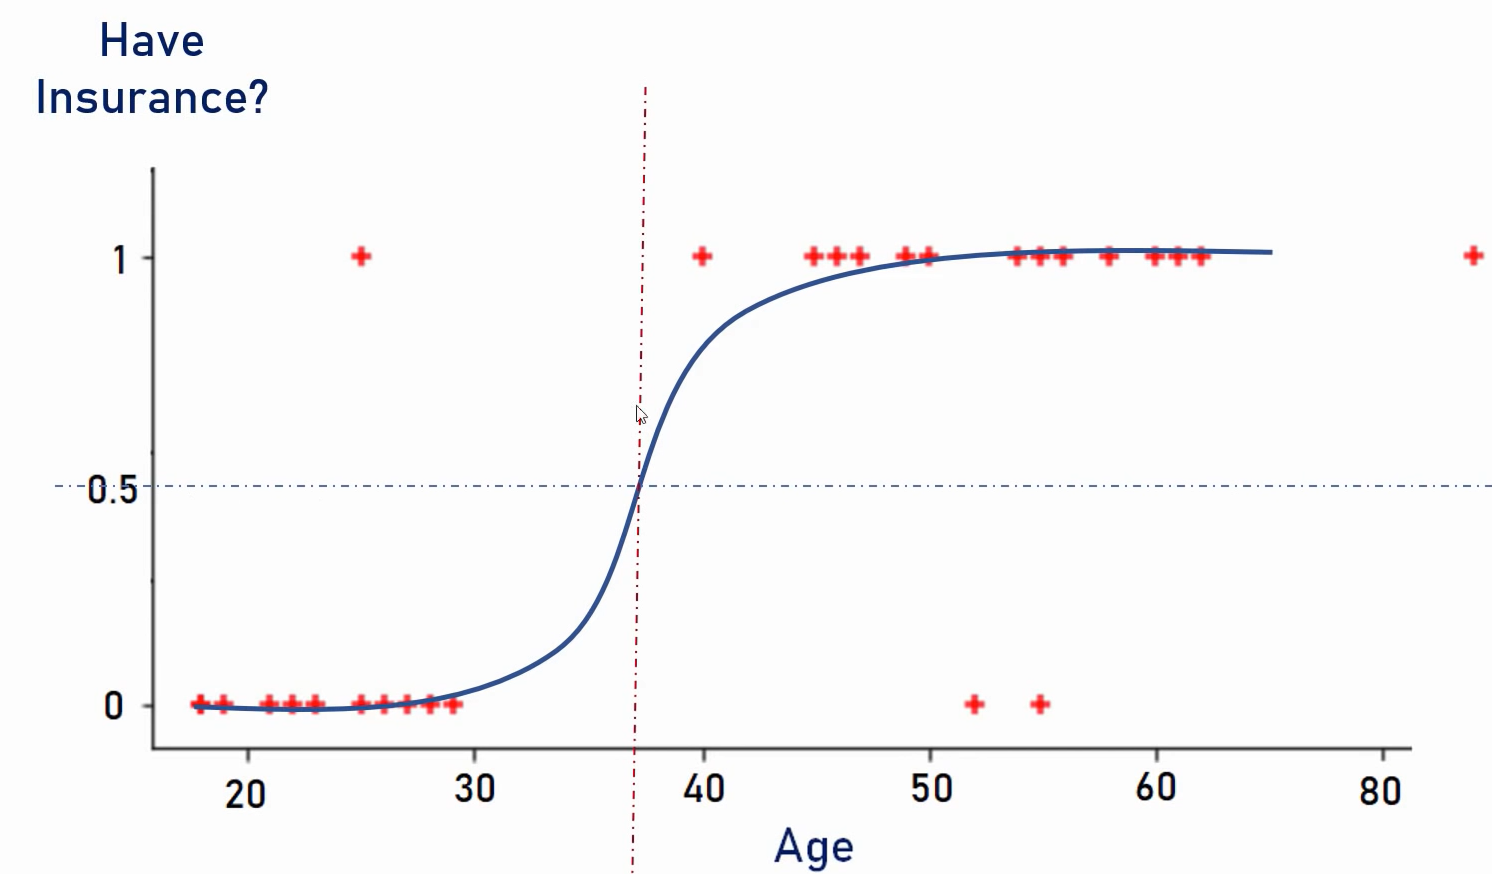

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_test

,age
16,25
24,50
4,46
21,26
26,23
11,28


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Prediction
# y_predicted = model.predict(X_test)
model.predict(X_test)

array([0, 1, 1, 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.93208787, 0.06791213],
       [0.2274513 , 0.7725487 ],
       [0.35250564, 0.64749436],
       [0.92168999, 0.07831001],
       [0.94914437, 0.05085563],
       [0.89643031, 0.10356969]])

In [ ]:
model.score(X_test,y_test)
#show the accuracy of your model

0.8333333333333334

##**2.2- Logistic Regression (Multiclass Classification)**


https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

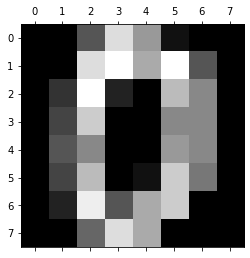

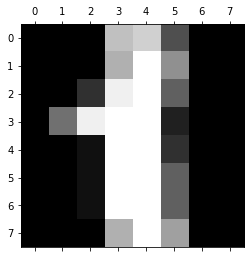

In [ ]:
plt.gray() 
for i in range(2):
    plt.matshow(digits.images[i])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.3)


In [ ]:
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
# model.predict(digits.data[0:5])
model.predict([digits.data[60]])

array([3])

##**2.3-Dedecision Tree**


In [ ]:
df = pd.read_csv("salary.txt", delimiter = "\t")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


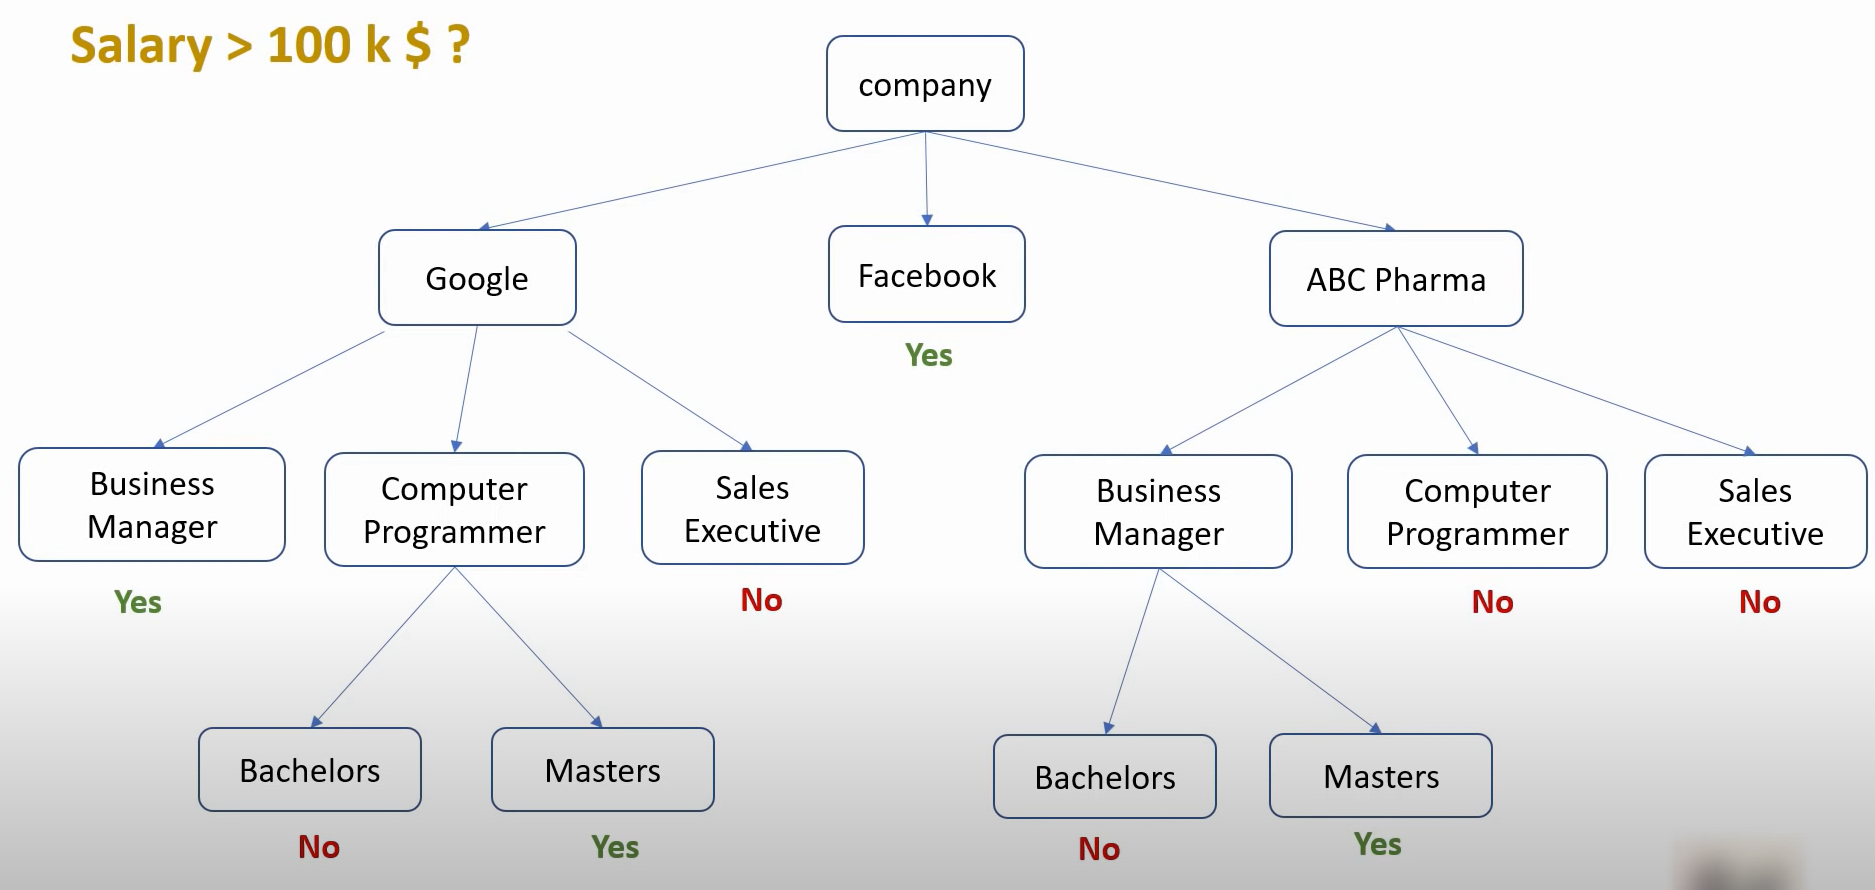

In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [ ]:
target = df['salary_more_then_100k']

In [ ]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
#Create new columns
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [ ]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [ ]:
#same data for test
model.score(inputs_n,target)

1.0

In [ ]:
model.predict([[2,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
model.predict([[2,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

##**2.4- Support Vector Machine (SVM)**

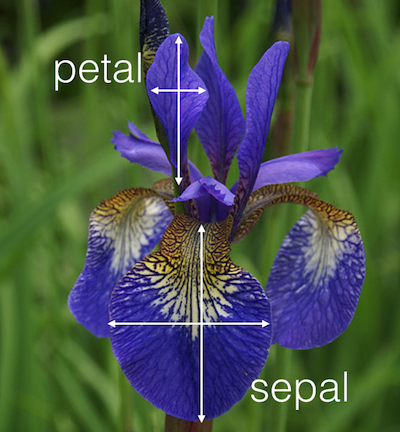

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train Using Support Vector Machine (SVM):**



In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train)

In [ ]:
len(X_test)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])